# 7 새와 비행기 구별하기: 이미지 학습
## 7.1 작은 이미지를 모아 놓은 데이터셋
- MNIST : 손글씨 숫자 인식 데이터셋으로 이미지 인식에서 기본이 되는 데이터셋 중 하나
- CIFAR-10 : 32 * 32 크기의 rgb이미지 6만 개로 구성, 1~10까지의 정수로 레이블 돼 있음
- 데이터셋을 자동으로 내려받고 파이토치 텐서 컬렉션으로 읽어들이기 위해 torchvision 모듈 사용 예정

### 7.1.1 CIFAR-10 다운로드

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [54]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [55]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [56]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [2]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7/' 
# 데이터를 받을 위치
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
# 훈련 데이터용 데이터 객체 만듦. 데이터 없으면 토치 비전이 알아서 다운로드함
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)
# train=False 설정으로 검증용 데이터를 얻을 수 있으며, 필요시 내려받게 됨

Files already downloaded and verified
Files already downloaded and verified


In [3]:
type(cifar10).__mro__
# torch.utils.data.Dataset의 서브클래스로 반환됨
# cifar10 인스턴스의 메소드를 분석하면 기본 클래스로 포함된 것 알 수 있음

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

### 7.1.2 데이터셋 클래스


In [4]:
# Dateset은__len__과__getitem__을 구현하기 위해 필요한 객체
# __len__ 메소드가 구현된 파이썬 객체하면 파이썬 내장 함수인 len의 인자로도 사용 가능
len(cifar10)

50000

In [42]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x25826D8FBB0>, 1, 'automobile')

<function matplotlib.pyplot.show(close=None, block=None)>

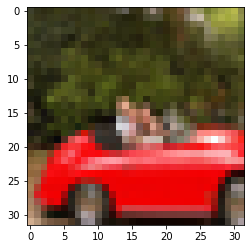

In [43]:
# data.CIFAR10 데이터셋 샘플은 RGB PIL 이미지 객체라서 바로 그릴 수 있음
plt.imshow(img)
plt.show

In [44]:
print(img)

<PIL.Image.Image image mode=RGB size=32x32 at 0x25826D8FBB0>


### 7.1.3 데이터 변환
- 이제 PIL 이미지를 파이토치 텐서로 변환 
- torchvision.transfroms 필요

In [7]:
from torchvision import transforms
# 이 모듈은 재구성 가능한 함수 형태의 여러 객체 정의하고 있어서 datasets.CIFAR10(...)같은 torchvision 데이터셋에 인자로 전달 가능
# 로드한 다음에 __getitem__가 결과를 반환하기에 앞서 변환을 수행
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_pil_constants',
 '_presets',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [8]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [9]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                                 transform=transforms.ToTensor())

In [46]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [47]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [48]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

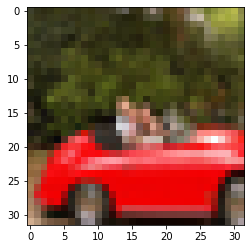

In [13]:
plt.imshow(img_t.permute(1,2,0)) # C * H * W 를 H * W * C 로 바꿔줌
plt.show()
# Matplotlib이 기대하는 H * W * C 형태 위해서 permute를 이용해 변경함

### 7.1.4 데이터 정규화
- 각 채널이 평균값 0과 단위 표준 편차를 가지게 만드는 것
- -1과 1 혹은 -2와 2 사이에서 선형인 활성 함수를 택하고 데이터를 같은 범위에서 평균을 가지게 한다면 뉴런은 0이 아닌 기울기를 가지게 되므로 빨리 학습할 수 있음
- 각 채널을 정규화해 동일한 분산을 가지게 한다면 채널 정보가 동일한 학습률로 경사 하강을 통해 섞이고 업데이트되는 것도 보장할 수 있음

In [14]:
# 추가 차원을 만들어 데이터셋이 반환하는 모든 텐서 쌓아 놓기
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
# stack : 지정하는 차원으로 확장하여 tensor를 쌓아주는 함수
imgs.shape

torch.Size([3, 32, 32, 50000])

In [15]:
imgs.view(3,-1).shape

torch.Size([3, 51200000])

In [16]:
imgs.view(3,-1).mean(dim=1)
# 세 채널은 유지하고 나머지 차원을 적절한 크기 하나로 합침
# 3 * 32 * 32 이미지는 3 * 1024 벡터로 바뀌고 각 채널의 1024 요소에 대해 계산

tensor([0.4914, 0.4822, 0.4465])

In [17]:
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [18]:
transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [19]:
transformed_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                                      transform=transforms.Compose([
                                          transforms.ToTensor(),
                                          transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                              (0.2470, 0.2435, 0.2616))
                                      ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


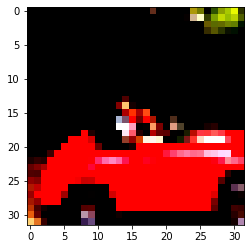

In [36]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

## 7.2 새와 비행기를 구별하기
### 7.2.1 데이터셋 구축

In [37]:
label_map = {0: 0, 2: 1}
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [52]:
img, _ = cifar2[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()

### 7.2.2 완전 연결 모델

In [22]:
import torch.nn as nn
n_out=2 #피처 두개: 비행기거나 새거나

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, n_out))

#512개의 은닉된 피처를 골랐고 tanh를 이용해 은닉층을 구성했다.

### 분류기 사용
- 로스함수 : MSELoss 사용 예정, 하지만 분류할 대상이 두 가지인 특수한 경우라면 BCELoss를 사용해도 됨
- 출력값이 카테고리기 때문에 카테고리 변수를 표현하기 위해 원핫 인코딩으로 바꿔줘야 함 (비행기 : [1,0] 새 : [0,1])
- 출력은 [비행기일 확률, 새일 확률] 형태로 나오기 때문에 출력값의 요소가 가질 수 있는 값은 0~1 임
- 출력을 확률로 표현하기 위해 다중분류에 쓰이는 Softmax함수 사용, 소프트맥스는 벡터값을 받아 동일한 차원의 다른 벡터를 만드는데 값들이 확률로 표현됨

### 소프트맥스 표현식
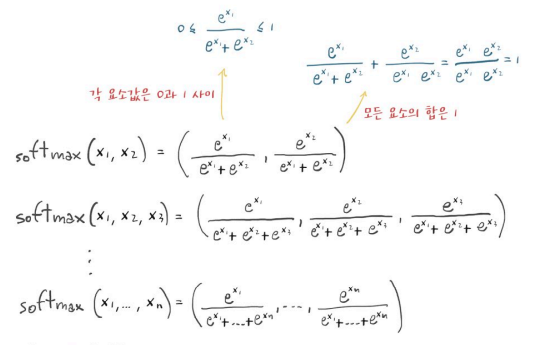

In [23]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [24]:
x = torch.tensor([1.0, 2.0, 3.0])

softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [25]:
#nn모듈을 이용해 구현가능하다. 소프트맥스 함수를 적용할 차원을 지정해줘야한다.
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [26]:
#모델의 끝에 소프트맥스 함수를 두어 신경망이 확률을 출력하게 만들었다.
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


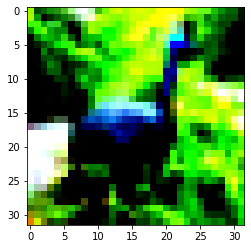

In [59]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [58]:
img_batch = img.view(-1).unsqueeze(0) #모델에 맞게 입력차원을 조정한다.
img_batch.shape

torch.Size([1, 3072])

In [60]:

out = model(img_batch)
out
#나온 확률은 훈련시키지 않고 신경망이 랜덤으로 초기화된 파라미터에 의해 추론된 값이다.

tensor([[0.5616, 0.4384]], grad_fn=<SoftmaxBackward0>)

In [61]:
#또한 결과값을 해석하기 위해 출력된 확률에 대해 argmax연산으로 레이블을 얻어낼 수 있다. 
# 이 연산은 제일 높은 확률에 대한 인덱스이다.

_, index = torch.max(out, dim=1)

index

tensor([0])

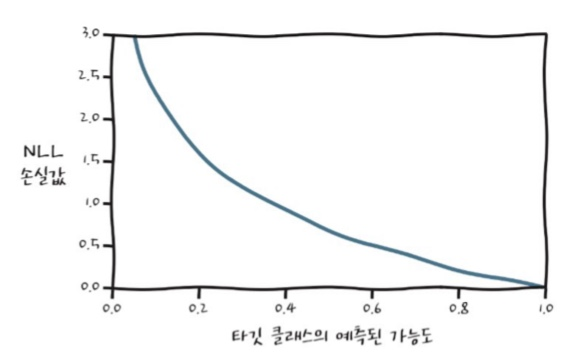

여기서는 손실함수로 NLL함수를 사용한다.

정확하게 0 or 1이런 확률이 아닌 모든 경우에 벌점을 주는 대신 분류가 어긋날 경우에 벌점을 주는게 훨씬 더 중요하다.

여기서는 out이 소프트맥스의 출력값이고 클래스는 비행기일때 0이고 새일때 1이다. 정답클래스 out[class_index]와 관련된 확률을 극대화 할 필요가 있다. 정답클래스에대한 확률수치를 likelihood라 한다. <br>
__즉, 다른 클래스의 확률이 매우 높을때 값이 커지는 손실함수가 필요하다.<br> 
반대로 가능도가 다른 클래스보다 높으면 손실값은 낮아야한다. <br>
확률값을 1까지로 올리는데 집착할 필요가 없다.__

이런식으로 동작하는 손실함수는 NLL(Negative Log Likelihood)함수이다. NLL=-sum(log(out_i[c_i]))

데이터에 낮은 확률이 주어질 경우 무한으로 늘어나는 반면 확률이 0.5보다 커지는 경우는 완만하게 감소하는 경향을 보인다

In [62]:
#softmax함수 사용하면 확률이 0에 가까울경우 문제가 되기 떄문에 Logsoftmax사용해 안정적인 계산을 한다.
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

loss = nn.NLLLoss()

#새를 예시로 테스트
img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))
# MSE사용하면 훨씬 더 일찍 포화되어 미분해도 기울기 값이 작아 좋지 않은 예측을 하게 된다. 
# MSE의 기울기는 잘못된 예측에 대한 소프트맥스 함수의 평탄화를 보상하기에 너무 작다.

tensor(0.5077, grad_fn=<NllLossBackward0>)

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label])) #브로드캐스팅 out: 1x2, torch.tensor([label]):1     
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

KeyboardInterrupt: 

batch gradient descent: 배치사이즈가 n으로 파라미터 업데이트를 n개 단위로 한꺼번에 진행, 비효율적이지만 안정적임

stochastic gradient descent: 배치사이즈가 1로 파라미터 업데이트를 1개마다 진행, 실시간 업데이트가 가능하지만 불안정함

mini-batch gradient descent: 배치사이즈가 1 ~ n 사이로 업데이트를 n/batchsize 마다 진행

In [ ]:
#torch.utils.data에는 미니배치의 데이터를 섞거나 구조화하는 작업을 돕는 DataLoader가 있음. 이를 활용해 샘플링을 다양한 전략을 통해 할수있다.

#데이터 로더가 데이터셋에서 개별 데이터 아이템을 샘플링하여 미니 배치를 구성하게한다.
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [ ]:
#반복문 부분만 바꿔주면됨.

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size=imgs.shape[0] #img.shape:[64,3,32,32]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [ ]:
#검증셋으로 테스트하기
val_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

In [ ]:
#모델에 계층을 더 추가하면 모델의 깊이나 용량이 늘어나게 된다.
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

#nn.LogSoftmax+nn.NLLLoss조합은 nn.CrossEntropyLoss와 동일하다.
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

loss_fn = nn.CrossEntropyLoss()

위에 두 모델 사용 시 train_data로만 졍확도를 측정하면 99%에 가까우며 검증셋은 그에 비해 낮게 나오는데 과적합임을 알수있다.

NLLLoss는 크로스엔트로피를 계산하지만 입력으로 로그확률 예측을 받는다.

CrossEntropyLoss는 logits이라 부르는 점수를 입력으로 받는다. 하지만 여기서는 모델의 출력을 확률로 해석하지 못하는 단점이 하나 있어 출력을 다시 소프트맥스에 명시적으로 연결 할 필요가 있다.

In [ ]:
#각 층마다 파라미터가 얼마나 있는지 확인해 볼 수 있다.
numel_list=[p.numel() for p in model.parameters() if p.requires_grad==True]

sum(numel_list),numel_list

#매우 많은 파라미터들이 있고 신경망을 픽셀수에 따라 확장 가능하는것은 어렵다.

## 7.4 연습문제

In [ ]:
# 1 랜덤으로 잘라낸 이미지로 훈련시킨 결과
torchvision_transform = transforms.Compose([
    transforms.Resize((300, 300)), 
    transforms.RandomCrop(224),
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

cifar10 = datasets.CIFAR10(data_path, train=True, download=True, transform=torchvision_transform)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,transform=torchvision_transform)

cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

batch_size=64

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size=imgs.shape[0] 
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [ ]:

val_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

In [ ]:
# 2 손실함수를 MSE로 한 결과
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.MSELoss()

n_epochs = 100

batch_size=64

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size=imgs.shape[0] 
        outputs = model(imgs.view(batch_size, -1))
        target_onehot = torch.zeros(labels.shape[0], 2)
        target_onehot.scatter_(1, labels.unsqueeze(1), 1.0)
        loss = loss_fn(outputs, target_onehot)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

In [ ]:
# 3 신경망을 간소화시켜 훈련한 결과
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),)

loss_fn = nn.CrossEntropyLoss()

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size=imgs.shape[0] 
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))